In [2]:
import xarray as xr
import numpy as np
import matplotlib
import datetime

import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import cartopy
import random

from config import InitializationConfig
from loader_and_saver import Loader, Saver
from main import parser_arguments
from utils import printt
from datahandler import create_handler
import cf_xarray as cfxr

In [1]:
bins_path = "/Net/Groups/BGI/scratch/crobin/PythonProjects/ExtremesProject/experiments/2024-11-25_18:41:43_deep_extreme_HR/EVI_EN/bins_2.zarr"
data = xr.open_zarr(bins_path)
data = cfxr.decode_compress_to_multi_index(data, "location")
data = data.bins.transpose("location", "component", ...)
condition = ~data.isnull().any(dim="component").compute()
bins = data.where(condition, drop=True)

NameError: name 'xr' is not defined

In [9]:
bins

<xarray.DataArray 'bins' (location: 16384, component: 3)> Size: 393kB
dask.array<where, shape=(16384, 3), dtype=float64, chunksize=(16384, 3), chunktype=numpy.ndarray>
Coordinates:
  * component  (component) int64 24B 0 1 2
  * location   (location) object 131kB MultiIndex
  * longitude  (location) float64 131kB 8.664e+05 8.664e+05 ... 8.689e+05
  * latitude   (location) float64 131kB 4.919e+06 4.918e+06 ... 4.916e+06

Text(0.5, 1.0, 'RGB Components on Earth Map')

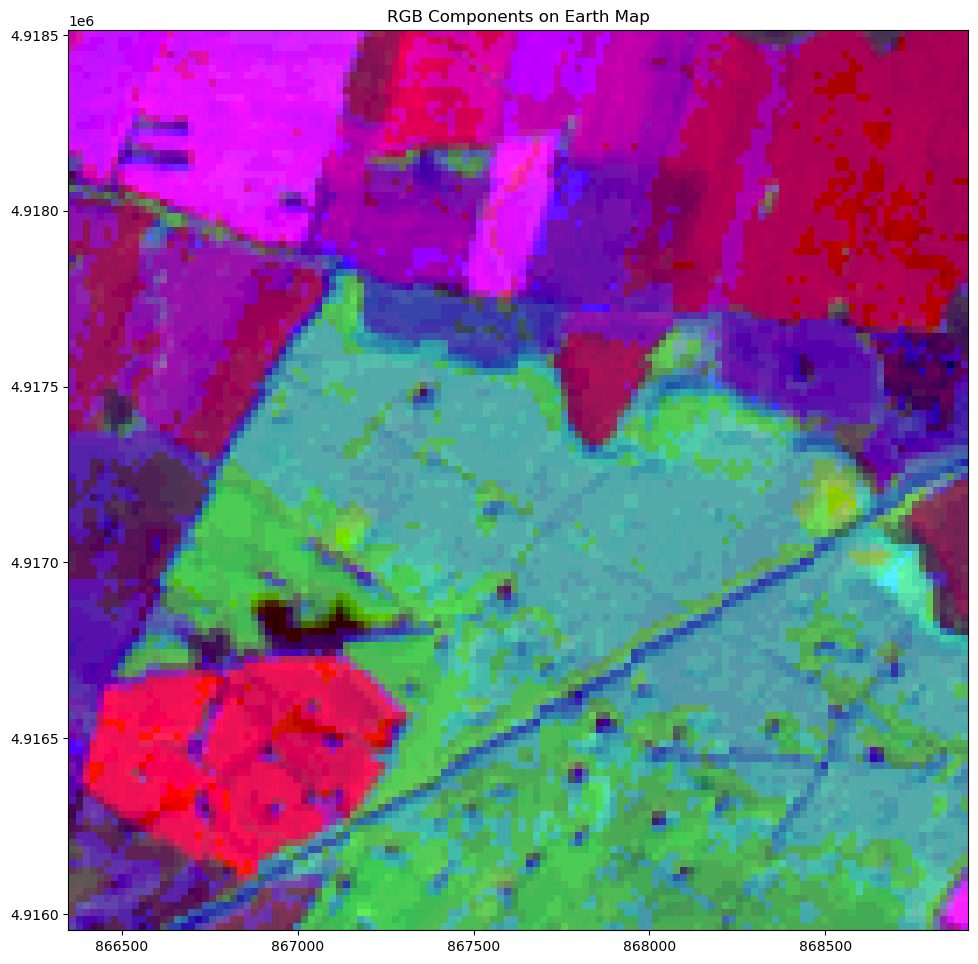

In [57]:
bins_path = "/Net/Groups/BGI/scratch/crobin/PythonProjects/ExtremesProject/experiments/2024-11-25_18:41:43_deep_extreme_HR/EVI_EN/bins_2.zarr"
data = xr.open_zarr(bins_path)
data = cfxr.decode_compress_to_multi_index(data, "location")
data = data.bins.transpose("location", "component", ...)
condition = ~data.isnull().any(dim="component").compute()
bins = data.where(condition, drop=True)
bins = bins.unstack("location")
# Normalize the explained variance
# Normalize the data to the range [0, 1]
def _normalization(index):
    band = bins.isel(component=index).values
    return (band - np.nanmin(band)) / (np.nanmax(band) - np.nanmin(band))
normalized_red = _normalization(0)  # Red is the first component
normalized_green = _normalization(1)  # Green is the second component
normalized_blue = _normalization(2)  # blue is the third component
# For the blue component, we'll use a constant value or a combination of red and green
# Option 1: Constant blue (e.g., 0)
# normalized_blue = np.zeros_like(normalized_red)
# Stack the components into a 3D array
rgb_colors = np.dstack((normalized_red, normalized_green, normalized_blue))
# Transpose the array
rgb_normalized = np.transpose(rgb_colors, (1, 0, 2))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
# adjust the plot
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

ax.pcolormesh(
    bins.longitude.values,
    bins.latitude.values,
    rgb_normalized,
    # transform=projection,
)
# Add a title
plt.title("RGB Components on Earth Map")


In [91]:
bins_path = "/Net/Groups/BGI/scratch/crobin/PythonProjects/ExtremesProject/experiments/2024-11-25_18:41:43_deep_extreme_HR/EVI_EN/bins_2.zarr"
data = xr.open_zarr(bins_path)
data = cfxr.decode_compress_to_multi_index(data, "location")
data = data.bins.transpose("location", "component", ...)
condition = ~data.isnull().any(dim="component").compute()
bins = data.where(condition, drop=True)
# bins = bins.unstack("location")
# Normalize the explained variance
def _normalization(index):
    band = bins.isel(component=index).values
    print(index, np.nanmin(band), np.nanmax(band))
    return (band - np.nanmin(band)) / (np.nanmax(band) - np.nanmin(band))
normalized_red = _normalization(0)  # Red is the first component
normalized_green = _normalization(1)  # Green is the second component
normalized_blue = _normalization(2)  # blue is the third component
# For the blue component, we'll use a constant value or a combination of red and green
# Option 1: Constant blue (e.g., 0)
# normalized_blue = np.zeros_like(normalized_red)
# Stack the components into a 3D array
rgb_colors = np.dstack((normalized_red, normalized_green, normalized_blue))
# Transpose the array
rgb_normalized = np.transpose(rgb_colors, (1, 0, 2))


0 0.0 27.0
1 0.0 15.0
2 1.0 4.0


In [87]:
rgb_normalized = (rgb_normalized - np.min(rgb_normalized)) / (np.max(rgb_normalized) - np.min(rgb_normalized))
print(f"Min: {rgb_normalized.min()}, Max: {rgb_normalized.max()}")
print(f"Mean per channel: {rgb_normalized.mean(axis=(0, 1))}")

Min: 0.0, Max: 1.0
Mean per channel: [0.4619359  0.51619069 0.43196366]


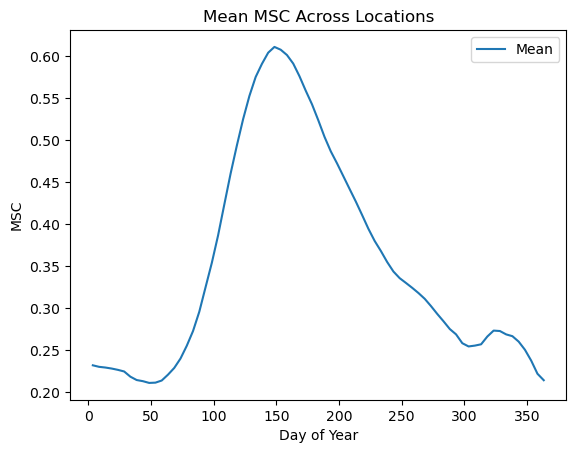

In [45]:
mean_data = data.msc.mean(dim="location")  # Calculate mean across locations
mean_data.plot(label='Mean')
plt.title('Mean MSC Across Locations')
plt.xlabel('Day of Year')
plt.ylabel('MSC')
plt.legend()
plt.show()

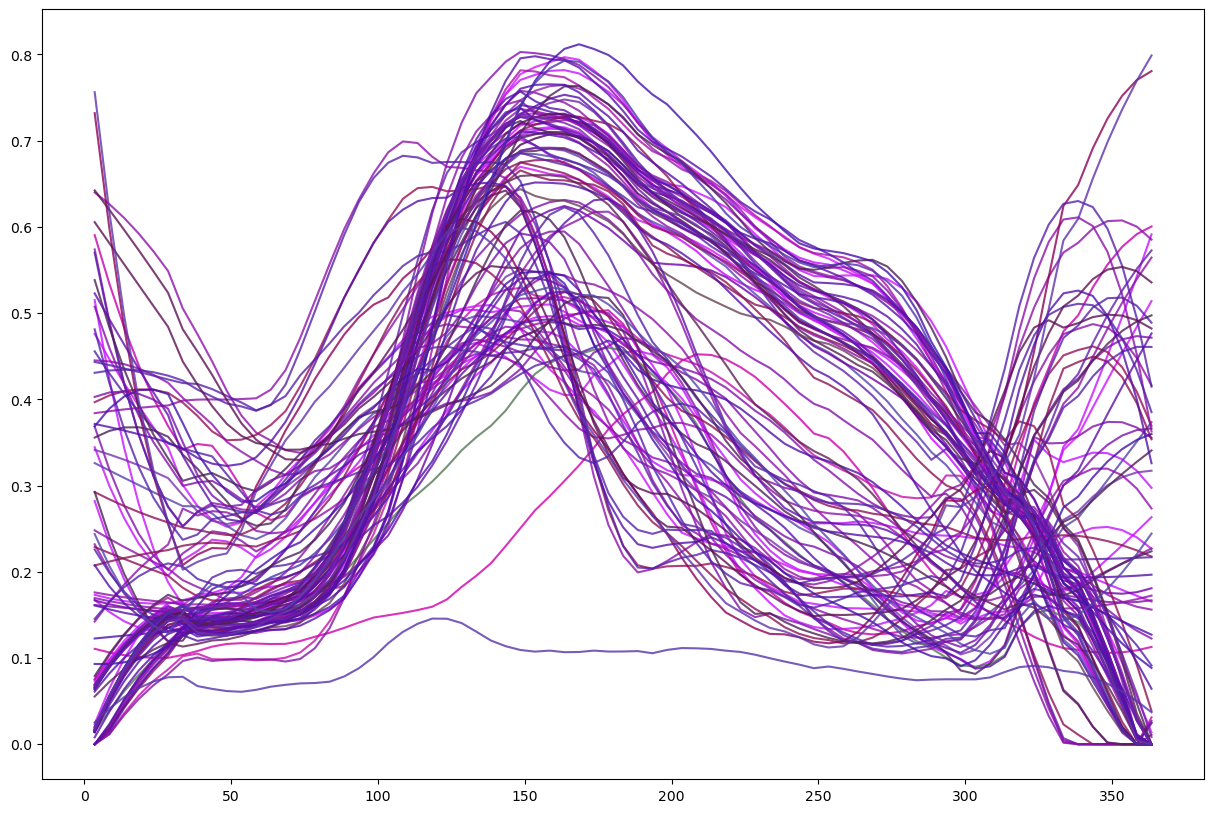

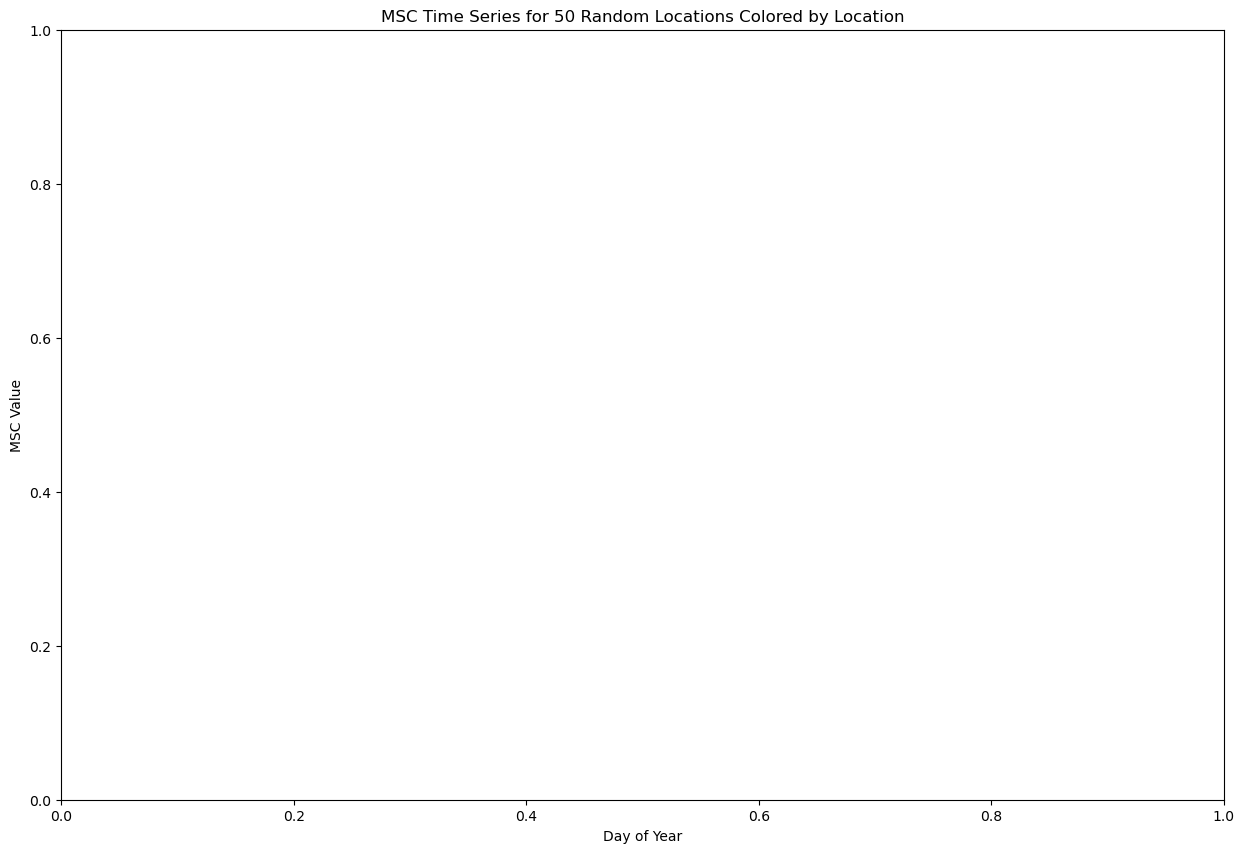

In [92]:
# Load and preprocess the time series dataset
time_series_path = "/Net/Groups/BGI/scratch/crobin/PythonProjects/ExtremesProject/experiments/2024-11-25_18:41:43_deep_extreme_HR/EVI_EN/msc_4.zarr"
time_series_data = xr.open_zarr(time_series_path)
time_series_data = cfxr.decode_compress_to_multi_index(time_series_data, "location")

# Randomly select 50 locations
random_locations = np.random.choice(time_series_data.location.values, size=100, replace=False)
subset = time_series_data.sel(location=random_locations)

plt.style.use('default')  # Reset style for clarity
# Plot the subset
# Plot the time series with corresponding colors
fig, ax = plt.subplots(figsize=(15, 10))
plt.figure(figsize=(15, 10))
for i, loc in enumerate(subset.location):
    rgb_color = tuple(rgb_normalized[i, 0])# rgb_colors[0, i]# Convert to a tuple for Matplotlib
    ax.plot(
        subset.dayofyear,
        subset.msc.sel(location=loc),
        color=rgb_color, 
        label=f"Loc: {loc}",
        alpha=0.8,
    )

# Add labels and optional legend
plt.title("MSC Time Series for 50 Random Locations Colored by Location")
plt.xlabel("Day of Year")
plt.ylabel("MSC Value")
plt.show()

KeyError: "'location' is not a valid dimension or coordinate for Dataset with dimensions FrozenMappingWarningOnValuesAccess({'time': 407})"

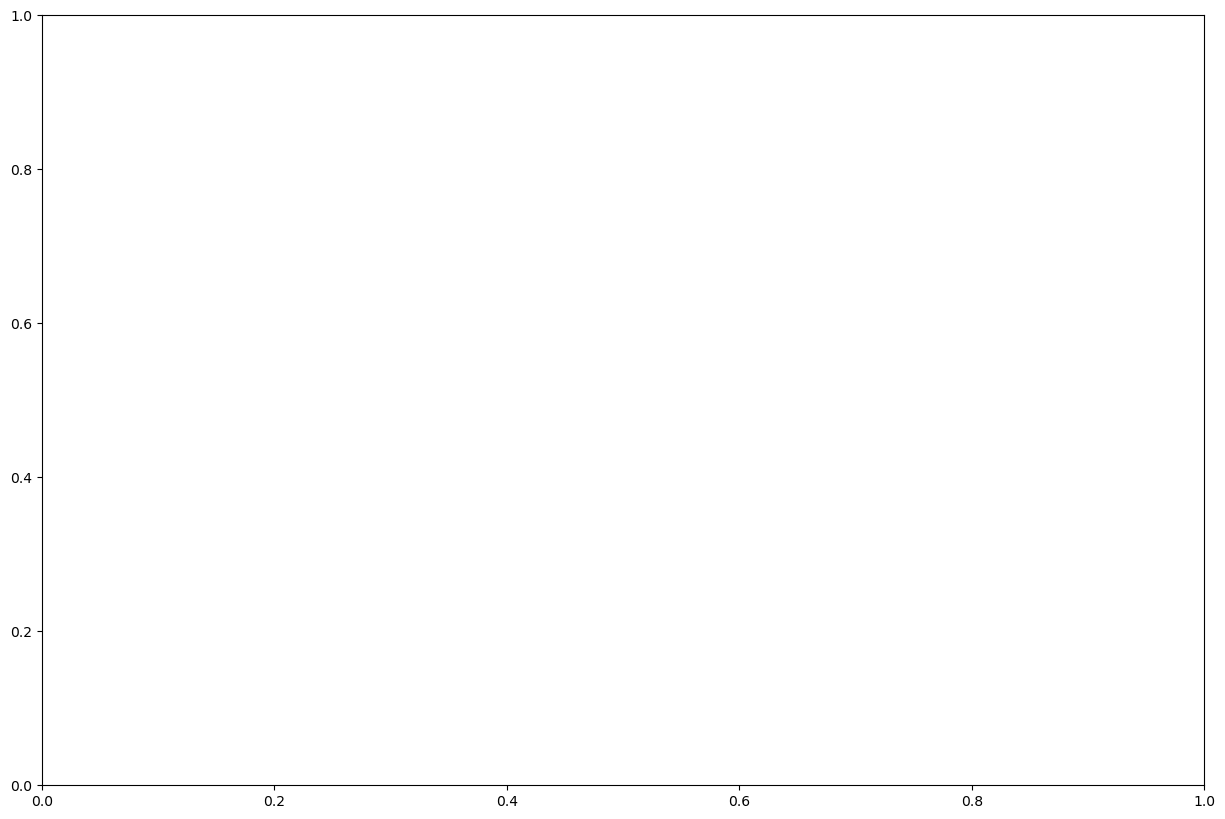

<Figure size 1500x1000 with 0 Axes>

In [95]:
# Load and preprocess the time series dataset
time_series_path = "/Net/Groups/BGI/scratch/crobin/PythonProjects/ExtremesProject/experiments/2024-11-25_18:41:43_deep_extreme_HR/EVI_EN/clean_data_4.zarr"
time_series_data = xr.open_zarr(time_series_path)
time_series_data = cfxr.decode_compress_to_multi_index(time_series_data, "location")

# Randomly select 50 locations
random_locations = np.random.choice(time_series_data.location.values, size=100, replace=False)
subset = time_series_data.sel(location=random_locations)

plt.style.use('default')  # Reset style for clarity
# Plot the subset
# Plot the time series with corresponding colors
fig, ax = plt.subplots(figsize=(15, 10))
plt.figure(figsize=(15, 10))
for i, loc in enumerate(subset.location):
    rgb_color = tuple(rgb_normalized[i, 0])# rgb_colors[0, i]# Convert to a tuple for Matplotlib
    ax.plot(
        subset.time,
        subset.time.sel(location=loc),
        color=rgb_color, 
        label=f"Loc: {loc}",
        alpha=0.8,
    )

# Add labels and optional legend
plt.title("MSC Time Series for 50 Random Locations Colored by Location")
plt.xlabel("Day of Year")
plt.ylabel("MSC Value")
plt.show()

(0.7777777777777778, 0.0, 0.6666666666666666)
(0.8148148148148148, 0.0, 0.6666666666666666)
(0.7777777777777778, 0.06666666666666667, 0.6666666666666666)
(0.7777777777777778, 0.06666666666666667, 1.0)
(0.7777777777777778, 0.06666666666666667, 1.0)
(0.8148148148148148, 0.0, 1.0)
(0.7777777777777778, 0.06666666666666667, 1.0)
(0.7777777777777778, 0.06666666666666667, 1.0)
(0.8148148148148148, 0.06666666666666667, 1.0)
(0.7777777777777778, 0.06666666666666667, 1.0)
(0.7777777777777778, 0.06666666666666667, 1.0)
(0.7777777777777778, 0.06666666666666667, 1.0)
(0.8148148148148148, 0.06666666666666667, 1.0)
(0.8148148148148148, 0.06666666666666667, 1.0)
(0.7777777777777778, 0.06666666666666667, 1.0)
(0.8148148148148148, 0.06666666666666667, 1.0)
(0.8518518518518519, 0.06666666666666667, 1.0)
(0.6666666666666666, 0.06666666666666667, 0.6666666666666666)
(0.3333333333333333, 0.26666666666666666, 0.6666666666666666)
(0.3333333333333333, 0.26666666666666666, 0.6666666666666666)
(0.296296296296296

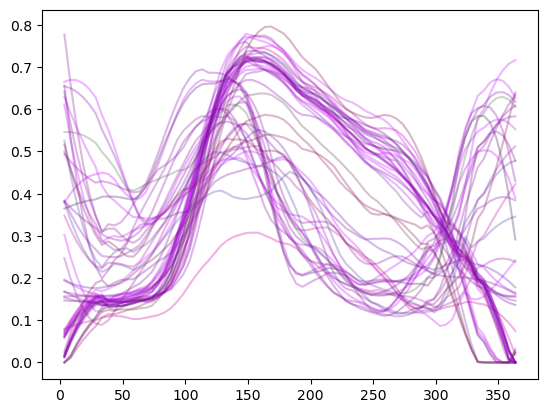

In [83]:
for i, loc in enumerate(subset.location):
    rgb_color = tuple(rgb_normalized[i][0])  # Ensure this is a single (R, G, B) tuple
    print(rgb_color)
    plt.plot(
        subset.dayofyear,
        subset.msc.sel(location=loc),
        color=rgb_color,
        label=f"Loc: {loc}",
        alpha=0.3,
    )
plt.show()

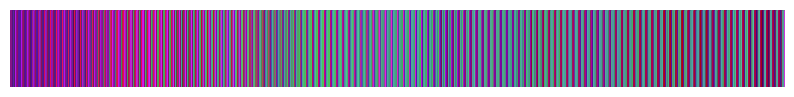

In [93]:
# Create a color strip to check RGB values
fig, ax = plt.subplots(figsize=(10, 1))
for i, color in enumerate(rgb_normalized):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, len(rgb_normalized))
ax.axis('off')
plt.show()

<xarray.DataArray 'thresholds' (quantile: 6, longitude: 128, latitude: 128)> Size: 786kB
dask.array<reshape, shape=(6, 128, 128), dtype=float64, chunksize=(6, 128, 128), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float64 1kB 8.664e+05 8.664e+05 ... 8.689e+05
  * latitude   (latitude) float64 1kB 4.916e+06 4.916e+06 ... 4.919e+06
  * quantile   (quantile) float64 48B 0.01 0.025 0.05 0.95 0.975 0.99


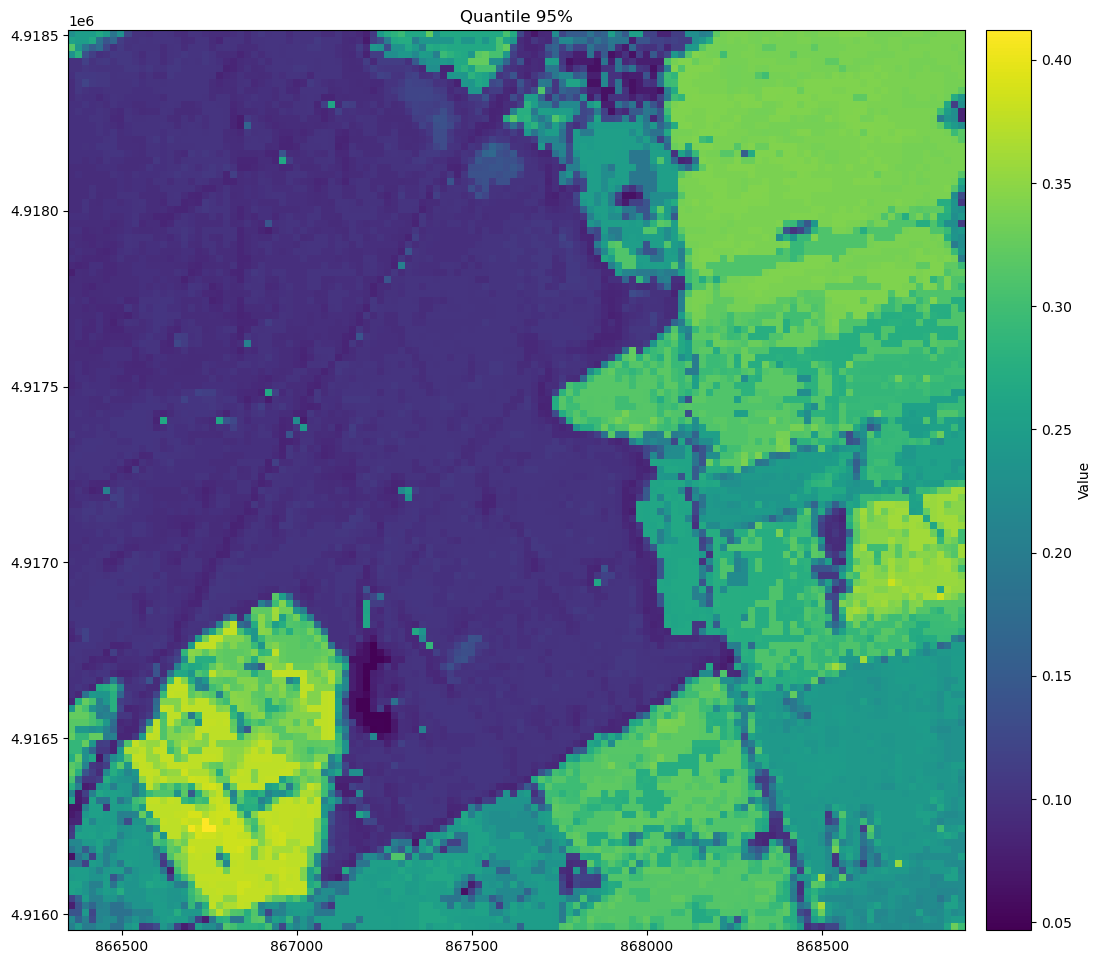

In [39]:
bins_path = "/Net/Groups/BGI/scratch/crobin/PythonProjects/ExtremesProject/experiments/2024-11-25_18:41:43_deep_extreme_HR/EVI_EN/thresholds_1.zarr"
data = xr.open_zarr(bins_path)
data = cfxr.decode_compress_to_multi_index(data, "location").thresholds
data = data.unstack("location")
print(data)


fig, ax = plt.subplots(figsize=(12, 10))
# Adjust the plot
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

# Plot the data with a colormap
pcm = ax.pcolormesh(
    data.longitude.values,
    data.latitude.values,
    data.sel(quantile=0.95).values,
    cmap="viridis"  # Choose a colormap, e.g., 'viridis', 'plasma', 'coolwarm'
)

# Add a title
plt.title("Quantile 95%")

# Add a colorbar
cbar = plt.colorbar(pcm, ax=ax, orientation="vertical", pad=0.02)
cbar.set_label("Value")  # Set the label for the colorbar

plt.show()